We want to minimize the following expectation
$$\underset{\phi}{\min} \mathbb{E}_{q_\phi (x)}[f(x)]$$
We need to compute the gradient w.r.t. $\phi$. We apply the likelihood ratio trick:

\begin{eqnarray}
\nabla_\phi \mathbb{E}_{q_\phi (x)}[f(x)] & = & \nabla_\phi \sum_x q_\phi (x) f(x) \\
& = & \sum_x \nabla_\phi q_\phi (x) f(x) \\
& = & \sum_x q_\phi (x) \frac{\nabla_\phi q_\phi (x)}{q_\phi (x)} f(x)\\
& = & \mathbb{E}_{q_\phi (x)} \nabla_\phi \log q_\phi(x) f(x) \\
& = & \frac{1}{K} \sum_{i = 1}^K \nabla_\phi \log q_\phi (x^{(i)}) f(x^{(i)})
\end{eqnarray}
where $x^{(i)} \sim q_\phi (x)$.

This Likelihood Ratio Gradient has high variance, especially in higher dimensional spaces.
An example in 2D:

Minimize the following loss function:

\begin{eqnarray}
\mathcal{L} = \mathbb{E}_{\mathcal{N}(\mu, I)} \left[\left\lvert\left\lvert x - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right\rvert\right\rvert_2^2 \right]
\end{eqnarray}


Apply the formula

\begin{eqnarray}
\nabla_\mu \mathcal{L} & = & \mathbb{E}\left[\nabla_\mu \log \left(\exp\left(-\frac{1}{2} (x - \mu)^\top I (x-\mu) \right)\right) f(x)\right] \\
& = & \mathbb{E} \left[\left\lvert\left\lvert x - \left[
\begin{matrix} 5 \\ 5 \end{matrix}
\right] \right\rvert\right\rvert_2^2 \nabla_\mu -\frac{1}{2} (x - \mu)^\top (x-\mu)  \right] \\
& = & \mathbb{E} \left[  \left\lvert\left\lvert x - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right\rvert\right\rvert_2^2 (x - \mu) \right]
\end{eqnarray}


In [21]:
import numpy as np
from matplotlib import pyplot as plt

mu = np.array([0, 0])
target = np.array([5, 5])
I = np.array([[1, 0], [0, 1]])
n=40

x = np.random.multivariate_normal(mean=mu, cov=I, size=(n,))

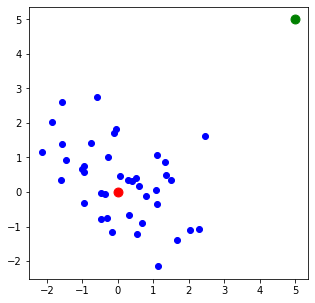

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(x[:, 0], x[:, 1], c='b')

ax.scatter(mu[0], mu[1], c='r', s=80)
ax.scatter(target[0], target[1], c='g', s=80)

In [23]:
def loss(z, target):
    return (np.linalg.norm(z - target, axis=1) ** 2).mean()

def lrg(z, mu, target):
    norm = np.linalg.norm(z - target, axis=1) ** 2
    # print('norm', norm)
    # print('z - mu', z - mu)
    grad = (norm[:, np.newaxis] * (z - mu)).mean(axis=0)

    # print('grad', grad)

    return grad

def train(mu, target, loss, lr, n_train, n_test, n_iter=10, viz=False):
    for it in range(n_iter):
        z = np.random.multivariate_normal(mean=mu, cov=I, size=n_train)
        lrgi = lrg(z, mu, target)
        mu = mu - lr * lrgi

        # visualization
        if viz:
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            ax.set_xlim(-5, 6)
            ax.set_ylim(-5, 6)
            ax.scatter(z[:, 0], z[:, 1], c='b')

            ax.scatter(mu[0], mu[1], c='r', s=80)
            ax.scatter(target[0], target[1], c='g', s=80)

        z_test = np.random.multivariate_normal(mean=mu, cov=I, size=n_test)
        lossi = loss(z_test, target)
        print(it, lossi)

When `n_train = 1`, the training is very unstable. It diverges when `lr = 0.1` and converges slowly when `lr = 0.01`.

In [24]:
## unstable learning rate
print('Unstable------------')
train(mu, target, loss, lr=0.1, n_train=1, n_test=100, n_iter=100)

## stable learning rate
print('Stable-----------')
train(mu, target, loss, lr=0.01, n_train=1, n_test=100, n_iter=100)

Unstable------------
0 80.66130147317025
1 53.966732199211066
2 173.36258329523724
3 700.9621515961201
4 24650.637218652464
5 1082067.1336874194
6 19664995565.285538
7 1.0042362969503197e+19
8 5.1870759079221246e+36
9 5.1870759079221246e+36
10 5.1870759079221246e+36
11 5.1870759079221246e+36
12 5.1870759079221246e+36
13 5.1870759079221246e+36
14 5.1870759079221246e+36
15 5.1870759079221246e+36
16 5.1870759079221246e+36
17 5.1870759079221246e+36
18 5.1870759079221246e+36
19 5.1870759079221246e+36
20 5.1870759079221246e+36
21 5.1870759079221246e+36
22 5.1870759079221246e+36
23 5.1870759079221246e+36
24 5.1870759079221246e+36
25 5.1870759079221246e+36
26 5.1870759079221246e+36
27 5.1870759079221246e+36
28 5.1870759079221246e+36
29 5.1870759079221246e+36
30 5.1870759079221246e+36
31 5.1870759079221246e+36
32 5.1870759079221246e+36
33 5.1870759079221246e+36
34 5.1870759079221246e+36
35 5.1870759079221246e+36
36 5.1870759079221246e+36
37 5.1870759079221246e+36
38 5.1870759079221246e+36
39 5.

Increasing `n_train` improve the stability of the training. Now `lr = 0.1` and greater still works well.
We can learn much faster due to larger learning rate.

0 26.8375501219945
1 16.347603496159305
2 12.054143582922643
3 7.723229446783527
4 5.100272471746026
5 3.322401961617546
6 3.022611380143666
7 2.49565342008404
8 2.4807844948732485
9 2.1485206702401896
10 2.2315344898482494
11 2.221352665858884
12 1.9118484833021319
13 1.9128300371658602
14 1.7671492194251939
15 2.0093099758662425
16 1.7961292223675027
17 1.9864584815029096
18 1.7290814693165717
19 2.3100597928849744
20 2.185192080953816
21 1.9256069827374436
22 1.9725788047424657
23 2.0863573740074868
24 2.1251788585259437
25 2.308360445329337
26 2.1766185297512672
27 1.9142475235435064
28 1.857352808691108
29 2.042186736693362
30 1.9155664620179809
31 2.087094011584305
32 2.126688856918358
33 2.2541100487800767
34 1.7479161992764907
35 2.0669776223137317
36 2.013813922723327
37 1.8753000679159404
38 1.623754323616092
39 1.9029748066248628
40 1.9756098986317472
41 2.067626400115711
42 2.125972752677618
43 2.1266214674623622
44 2.268377271475475
45 2.1009340260058433
46 1.7925000594244

<ipython-input-23-247436d360eb>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))


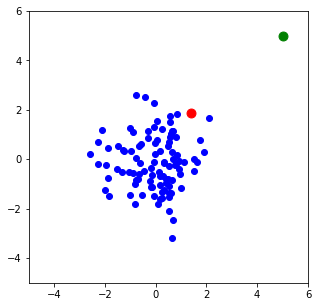

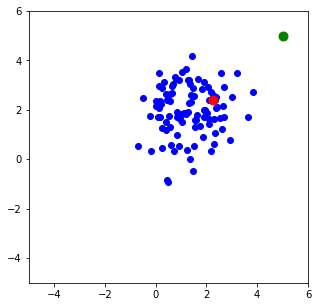

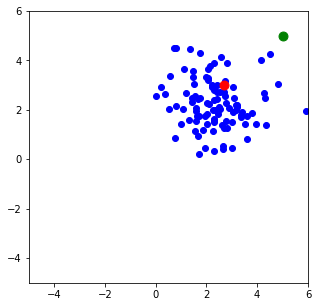

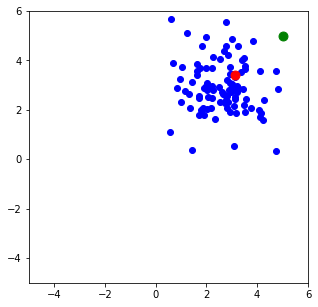

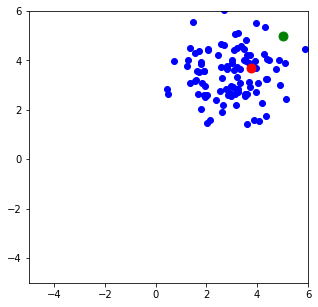

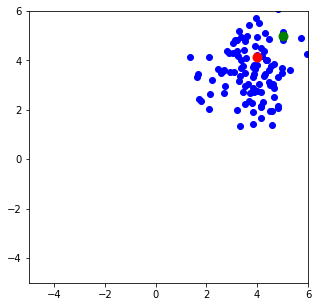

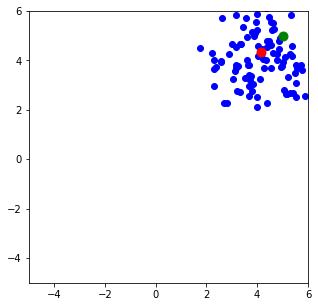

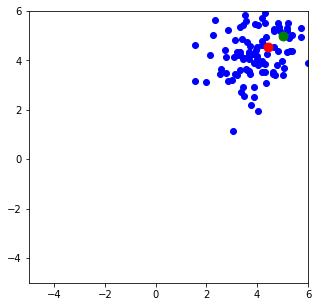

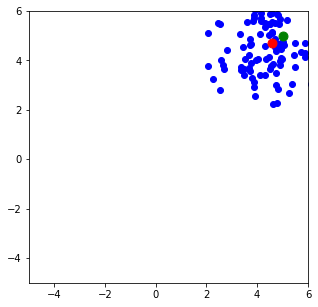

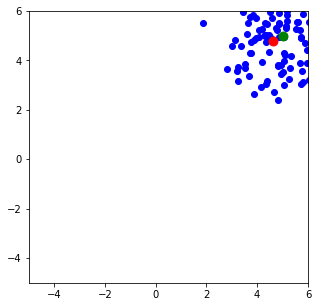

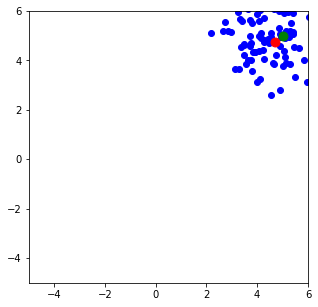

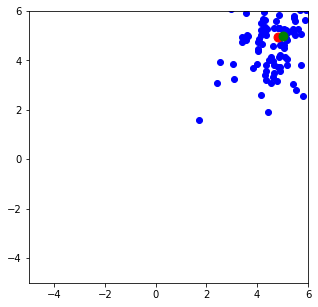

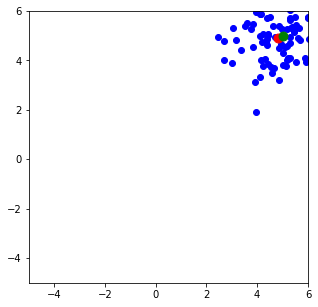

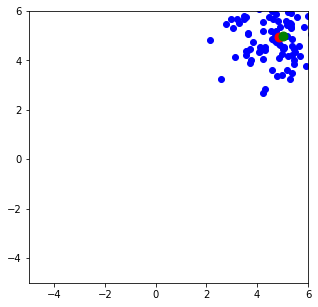

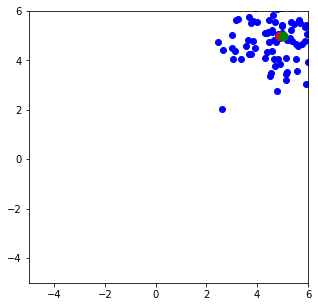

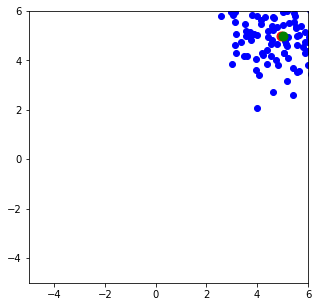

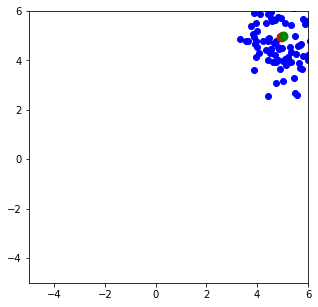

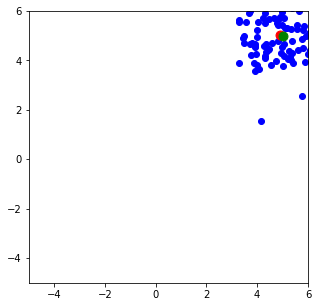

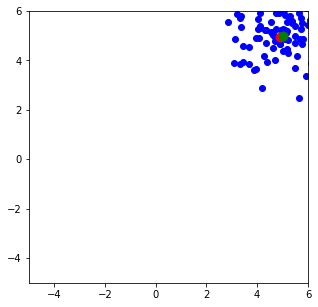

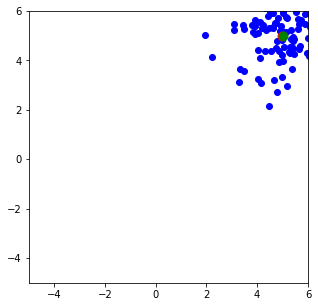

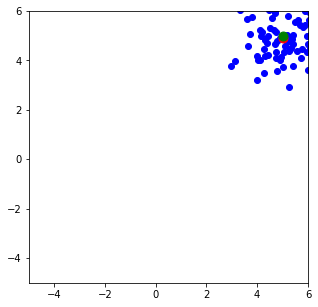

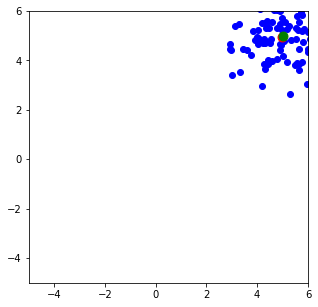

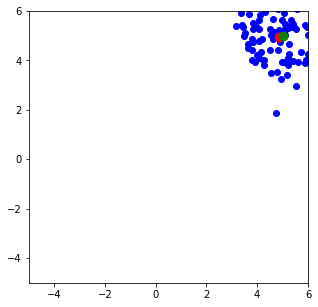

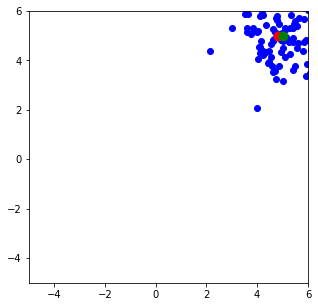

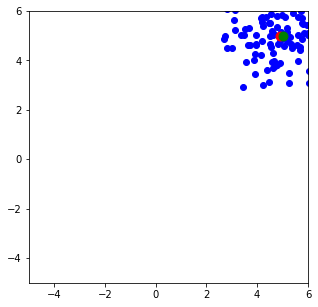

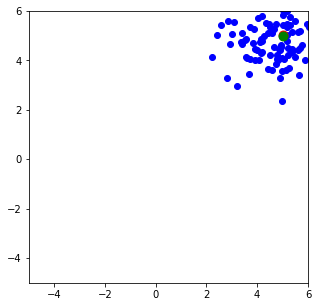

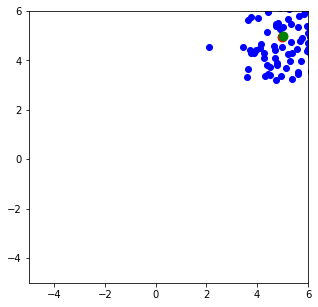

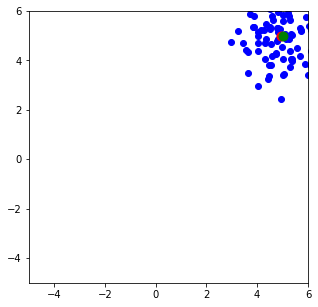

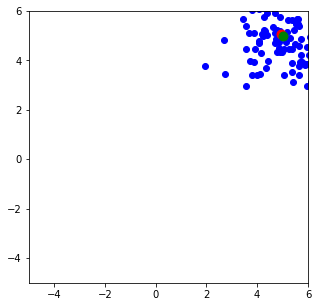

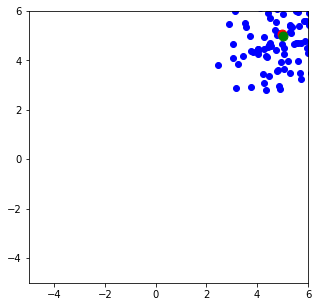

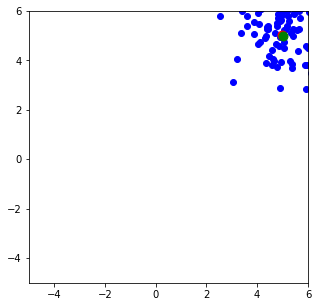

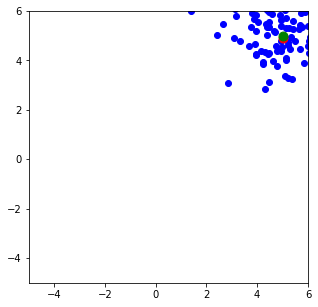

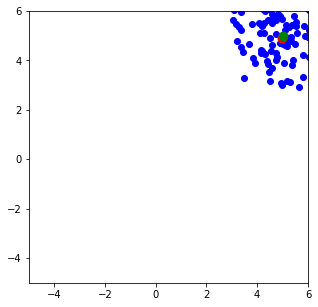

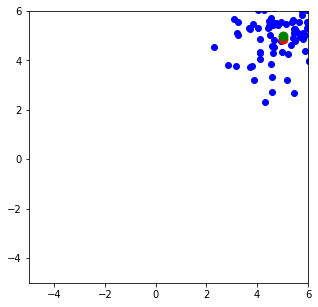

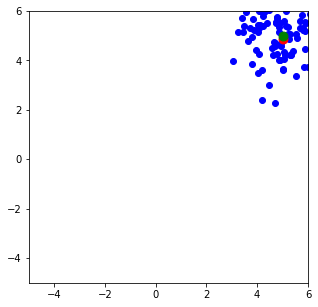

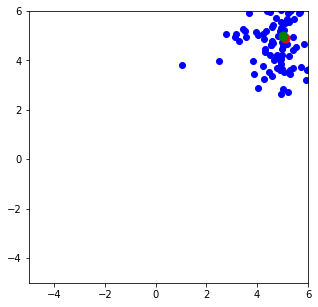

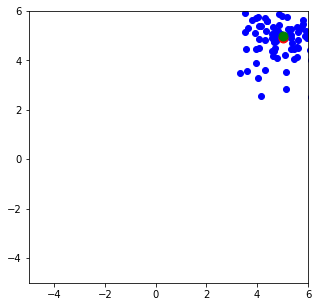

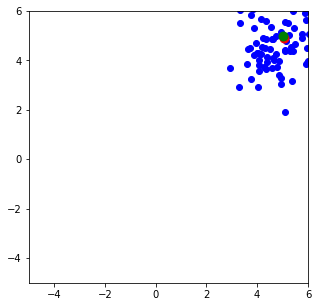

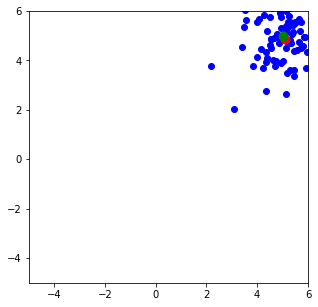

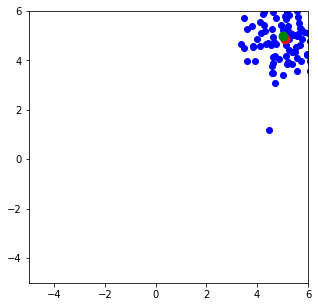

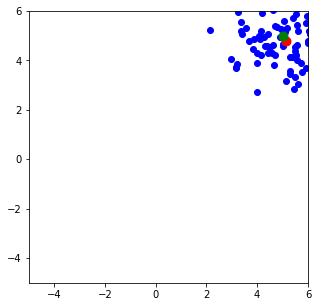

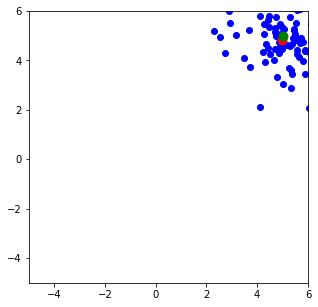

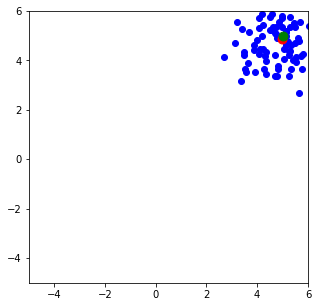

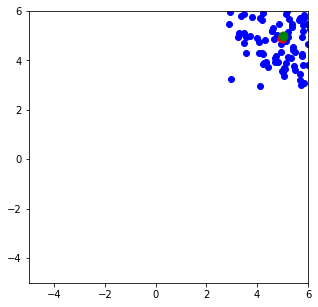

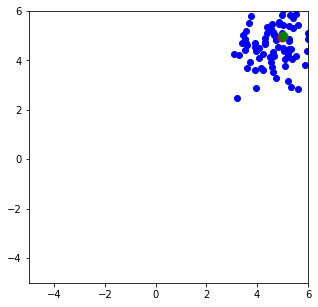

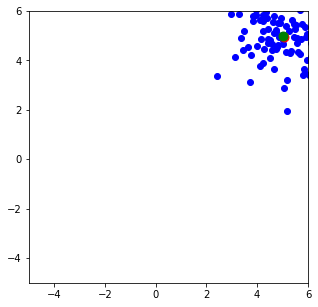

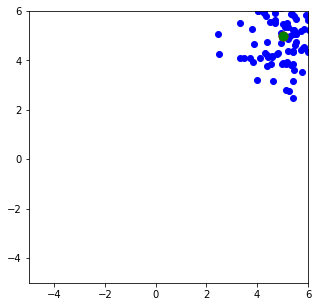

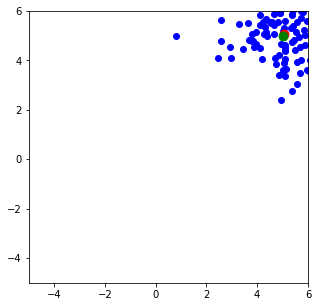

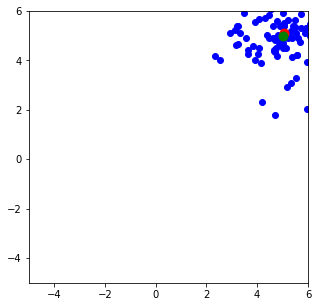

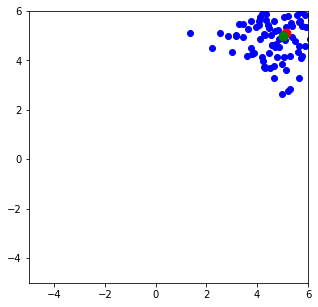

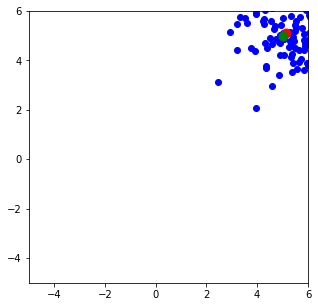

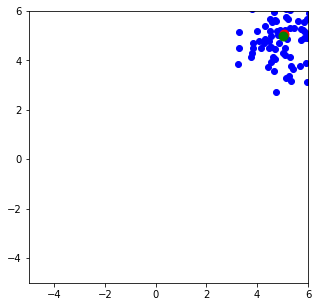

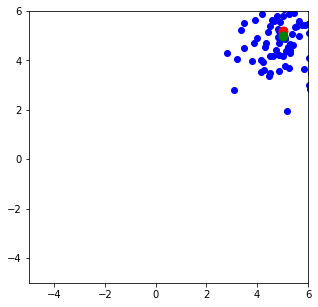

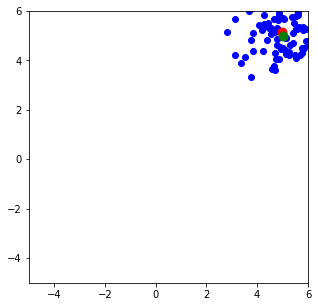

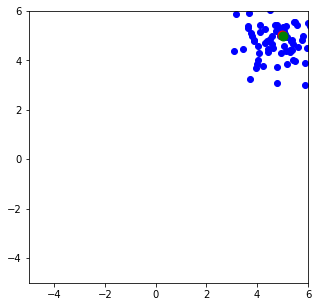

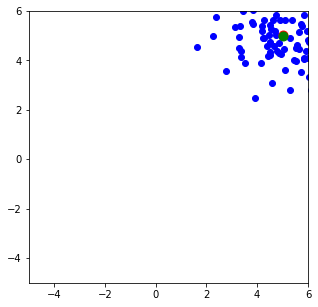

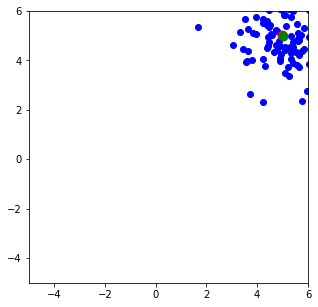

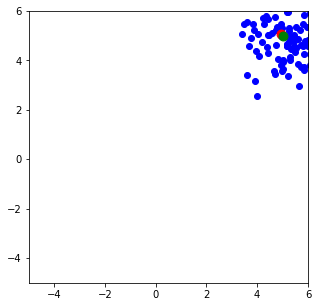

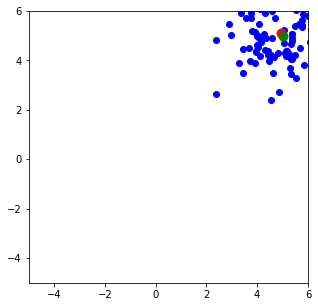

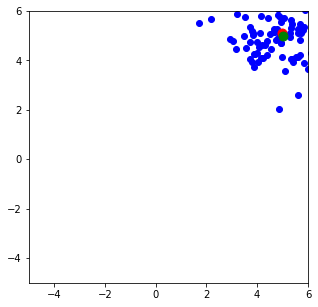

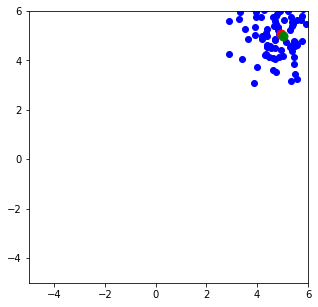

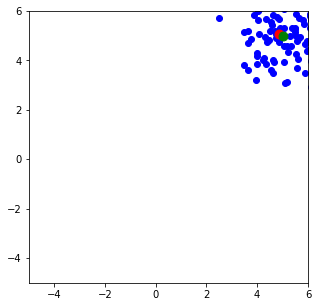

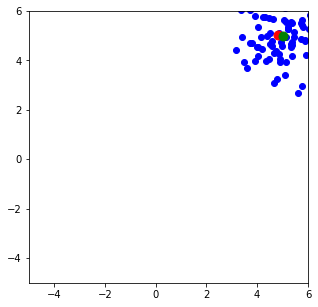

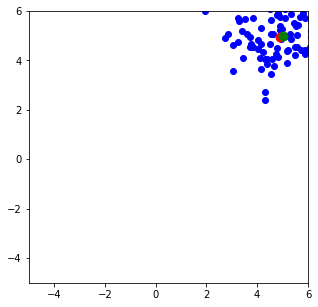

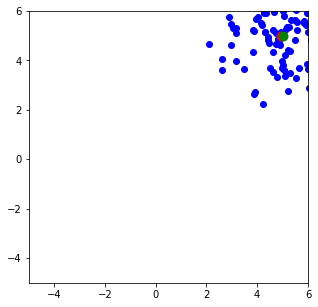

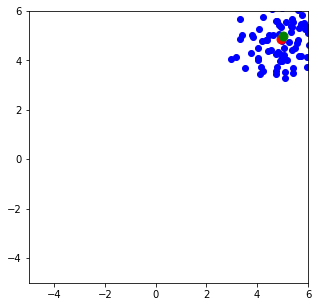

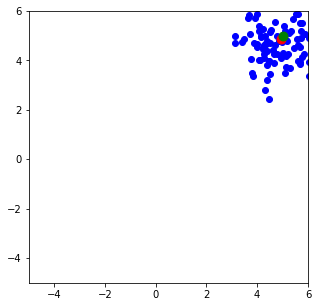

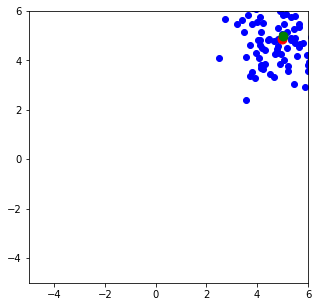

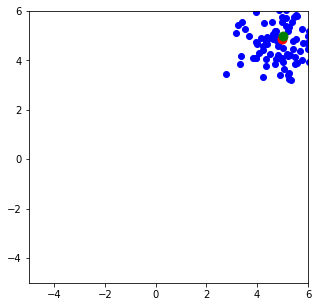

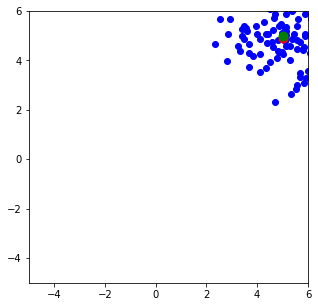

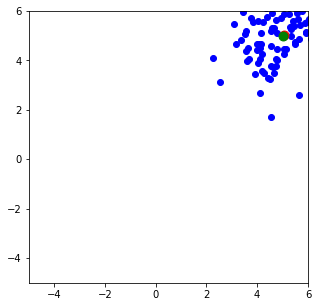

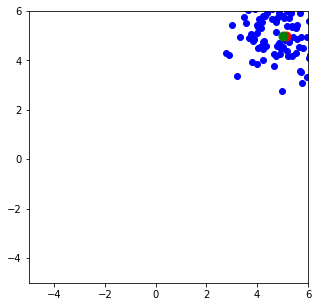

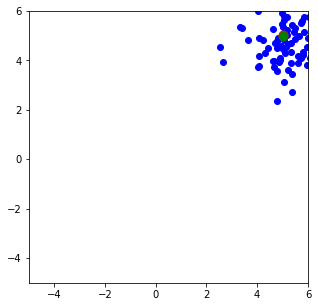

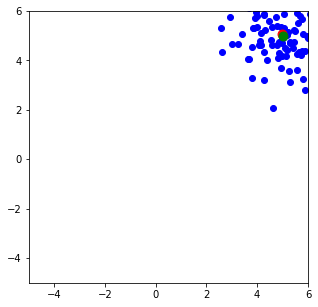

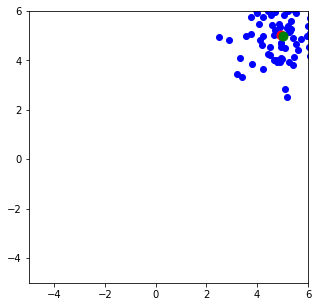

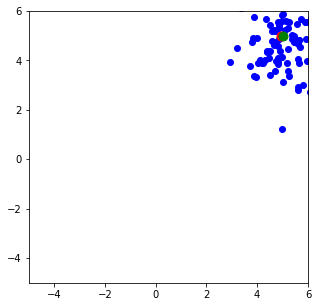

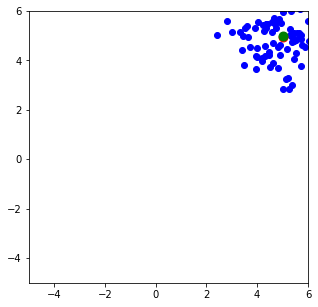

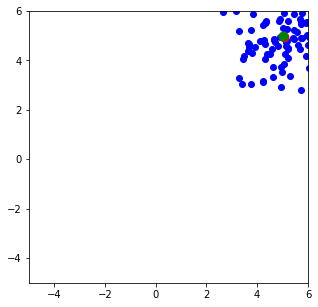

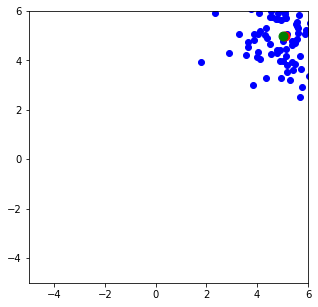

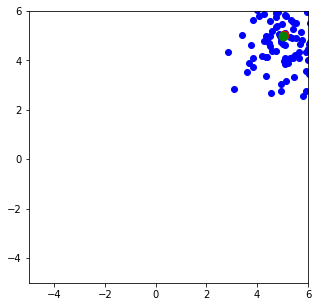

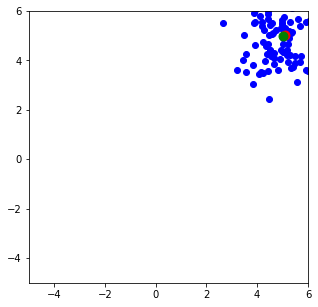

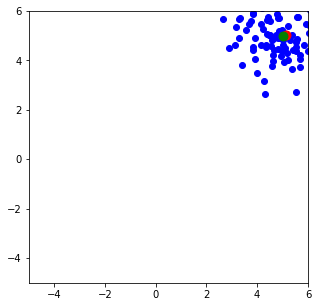

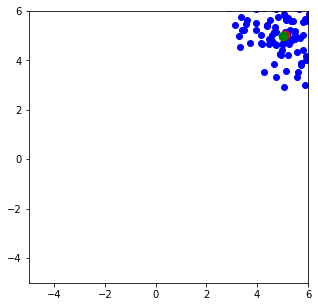

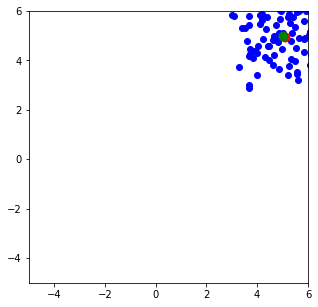

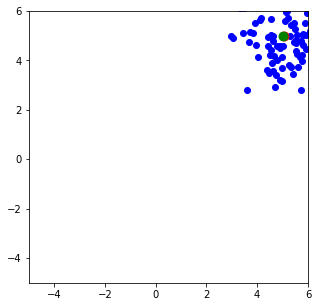

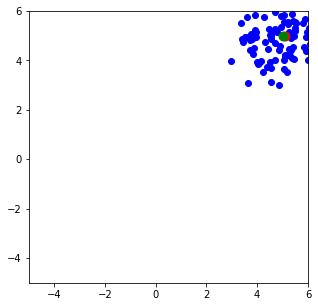

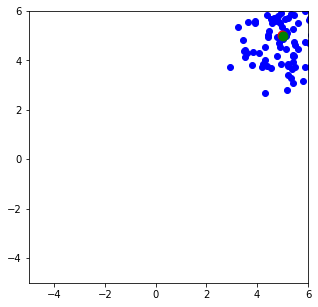

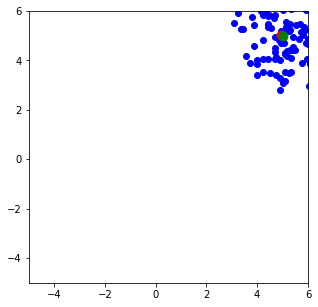

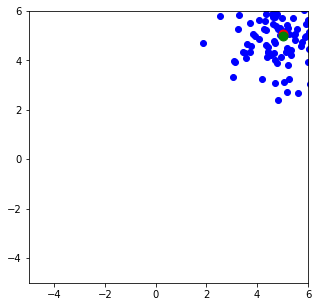

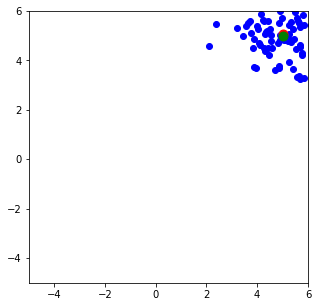

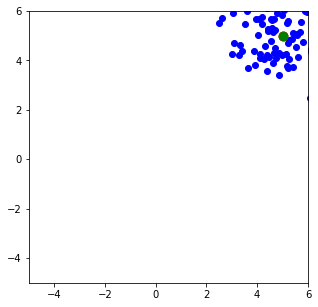

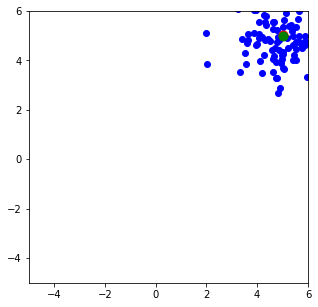

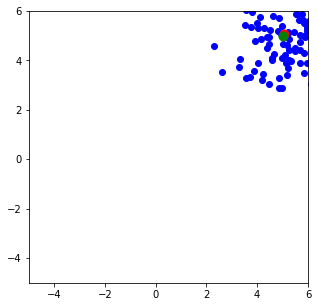

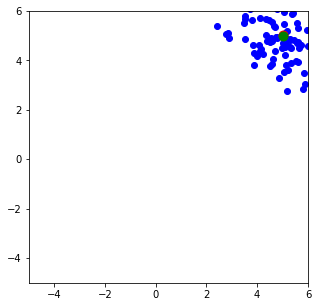

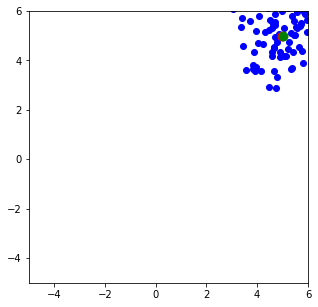

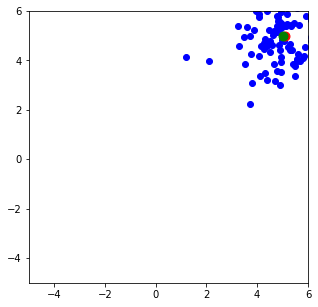

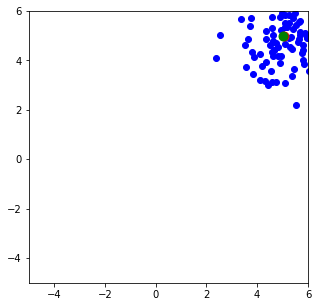

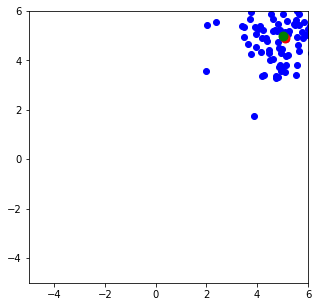

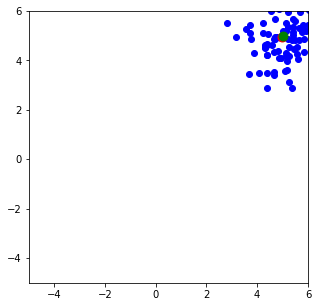

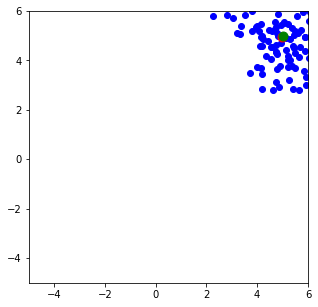

In [25]:
# train(mu, target, loss, lr=0.01, n_train=10, n_test=100, n_iter=100)

train(mu, target, loss, lr=0.1, n_train=100, n_test=100, n_iter=100, viz=True)

